# Challenge: Factors that affect life expectancy


Throughout this module, we dove deep into the topics of exploratory data analysis (EDA) and its substeps. Now it's time to apply your knowledge. In this challenge, you'll work with the [Life Expectancy dataset](https://www.kaggle.com/kumarajarshi/life-expectancy-who/home) from Kaggle. The data is collected from the websites of the World Health Organisation (WHO) and World Bank (WB). The dataset contains annual variables for many of the countries in the world which are divided into several broad categories: immunization related factors, mortality factors, economical factors, and social factors.

You should access the data from the Thinkful database. Here's the credentials you can use to connect to the database:

postgres_user = 'dsbc_student'<br>
postgres_pw = '7\*.8G9QH21'<br>
postgres_host = '142.93.121.174'<br>
postgres_port = '5432'<br>
postgres_db = 'lifeexpectancy'<br>
table_name = 'lifeexpectancy'<br>

To complete this challenge, submit a Jupyter notebook containing your solutions to the following tasks. Moreover, you can also submit a kernel to the Kaggle containing your solutions.

* Your goal in this challenge is to find the factors that affect the life expectancy. Specifically, you need to find out which factors increase the expected life in the countries and which factors decrease it.

* First, load the dataset.

* Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them. 

* Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect life expectancy.

* In the feature engineering step, you need to select a suite of variables that you think would be ideal in the modeling phase. More concretely, you may discard some variables that are very correlated with the other ones or the variables that you think irrelevant with the life expectancy.

* Summarize your findings. One of the most important skills of a data scientist is to convey ideas and findings to nontechnical people using understandable language. In this regard, one of the most effective ways to communicate your ideas is to do it using effective visualization.

In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from scipy.stats import zscore
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



warnings.filterwarnings('ignore')


postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

life = pd.read_sql_query('select * from lifeexpectancy',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()





In [107]:
life.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [108]:
# Iterating the columns and removing blank spaces

for c in life.columns:
    life.rename(columns={c:c.replace(' ','_')},inplace=True)

In [109]:
life.describe()

,Year,Life_expectancy_,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles_,_BMI_,under-five_deaths_,Polio,Total_expenditure,Diphtheria_,_HIV/AIDS,GDP,Population,_thinness__1-19_years,_thinness_5-9_years,Income_composition_of_resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [110]:
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life_expectancy_                   2928 non-null float64
Adult_Mortality                    2928 non-null float64
infant_deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage_expenditure             2938 non-null float64
Hepatitis_B                        2385 non-null float64
Measles_                           2938 non-null int64
_BMI_                              2904 non-null float64
under-five_deaths_                 2938 non-null int64
Polio                              2919 non-null float64
Total_expenditure                  2712 non-null float64
Diphtheria_                        2919 non-null float64
_HIV/AIDS                          2938 non-null

### Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them.

**Cleaning data:** The technique I used was to fill na values with mean per country and year. And remove null values where null values  portion was < than 2%

**Outliers:** Techniques for transforming variables and deal with outliers:

- Country
- Year
- Status
- Life_expectancy_ - Winsorize Transformation

- Adult_Mortality - Winsorize Transformation
- infant_deaths - Winsorize Transformation
- Alcohol - Winsorize Transformation
- percentage_expenditure - Log Transformation
- Hepatitis_B - W
- Measles_ = ????
- BMI - NO OUTLIERS
- under-five_deaths_ - ??
- Polio - Winsorize Transformation
- Total_expenditure. - Winsorize Transformation
- Diphtheria_ - Winsorize Transformation
- HIV/AIDS - ???
- GDP - Log Transformation
- Population - WHAT TO DO?
- _thinness__1-19_years - Winsorize Transformation
- _thinness_5-9_years - Winsorize Transformation
- Income_composition_of_resources - LOG O WINSORIZE??
- Schooling - Winsorize


Check out [here](Challenge%20-%20Outliers.ipynb) the technique details to deal with outliers.


In [177]:
round(life.isnull().sum()*100/life.isnull().count(),2)

Country                            0.0
Year                               0.0
Status                             0.0
Life_expectancy_                   0.0
Adult_Mortality                    0.0
infant_deaths                      0.0
Alcohol                            0.0
percentage_expenditure             0.0
Hepatitis_B                        0.0
Measles_                           0.0
_BMI_                              0.0
under-five_deaths_                 0.0
Polio                              0.0
Total_expenditure                  0.0
Diphtheria_                        0.0
_HIV/AIDS                          0.0
GDP                                0.0
Population                         0.0
_thinness__1-19_years              0.0
_thinness_5-9_years                0.0
Income_composition_of_resources    0.0
Schooling                          0.0
dtype: float64

All null values are in yellow


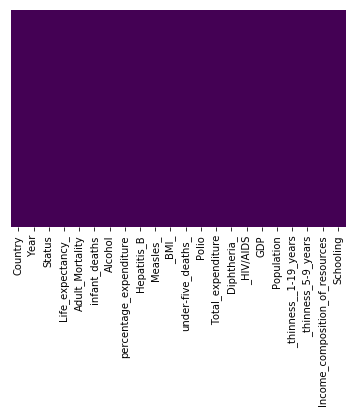

In [178]:
print('All null values are in yellow')
sns.heatmap(life.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [113]:
#Creating the function to clean with imputation based on year.

import math

def general_imputation_year(columns):
        
    """ Function: general_imputation based on a year and country
        Parameters: a list of columns to clean
        Return: string
    """     
    
    years = life['Year'].unique()
    countries = life['Country'].unique()
    
    for column_name in columns:

        new_column = column_name + '_n'
        #life[new_column] = life[column_name]
        
        for year in years:
            for country in countries:
                
                m=life[(life['Year']==year) & (life['Country']==country)][[column_name,'Year']].mean()
                mean = m.astype('float')

                group = (life['Year']==year)

                if math.isnan(mean[0]):            
                    mean_r = life[column_name].mean()

                else:
                    mean_r = life[(life['Year']==year) & (life['Country']==country)][column_name].mean()


                life.loc[group,column_name] = life.loc[group,column_name].fillna(mean_r)

                
    return 'Done'






In [114]:
general_imputation_year(['Hepatitis_B','GDP','Population','Alcohol','Income_composition_of_resources','Schooling','Total_expenditure'])

# we drop the null values after interpolation
life.dropna(inplace=True)


All null values are in yellow


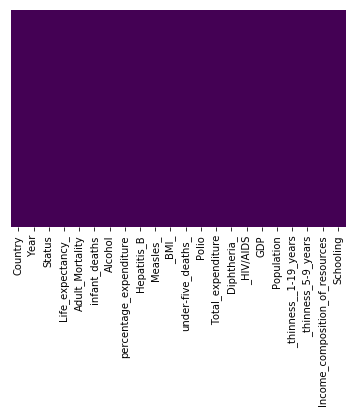

In [115]:
print('All null values are in yellow')
sns.heatmap(life.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [116]:
from scipy.stats.mstats import winsorize

#Transforming variables to handle outliers

trans_life = life[['Country','Year','Status']]
trans_life['Life_expectancy_'] = winsorize(life['Life_expectancy_'], (0.10, 0))
trans_life['Adult_Mortality']=winsorize(life['Adult_Mortality'], (0, 0.10))
trans_life['infant_deaths']=winsorize(life['infant_deaths'], (0,0.10))
trans_life['Alcohol']=winsorize(life["Alcohol"], (0.10, 0))
trans_life['percentage_expenditure']=np.log(life['percentage_expenditure'])
trans_life['Hepatitis_B']=winsorize(life['Hepatitis_B'], (0.10, 0))
trans_life['Measles_']=life['Measles_']
trans_life['_BMI_']=life['_BMI_']
trans_life['under-five_deaths_']= life['under-five_deaths_']
trans_life['Polio']=winsorize(life['Polio'], (0.10, 0))
trans_life['Total_expenditure']=winsorize(life['Total_expenditure'], (0,0.10))
trans_life['Diphtheria_']=winsorize(life['Diphtheria_'], (0.10, 0))
trans_life['_HIV/AIDS']=life['_HIV/AIDS']

trans_life['GDP']=np.log(life['GDP'])
trans_life['Population']=life['Population']
trans_life['_thinness__1-19_years']=winsorize(life['_thinness__1-19_years'], (0,0.10))
trans_life['_thinness_5-9_years']=winsorize(life['_thinness_5-9_years'], (0,0.10))
trans_life['Income_composition_of_resources']=np.log(life['Income_composition_of_resources'])
                                              
trans_life['Schooling']= winsorize(life['Schooling'], (0.10, 0))                                      
                                              
                                              

### Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect life expectancy.



**Relevant Variables:**

- Life_expectancy_ 
- Adult_Mortality  
- _BMI_            
- Polio            
- Diphtheria_      
- HIV/AIDS        
- Income_composition_of_resources 
- Schooling                       



See details [here](Univariate%20and%20Multivariate%20Exploration%20Techniques.ipynb) to review how variables were explored.

In [117]:
#Transforming  features

trans_life = life[['Country','Year','Status']]
trans_life['Life_expectancy_'] = winsorize(life['Life_expectancy_'], (0.10, 0))
trans_life['Adult_Mortality']=winsorize(life['Adult_Mortality'], (0, 0.10))
trans_life['infant_deaths']=winsorize(life['infant_deaths'], (0,0.10))
trans_life['Alcohol']=winsorize(life["Alcohol"], (0.10, 0))
trans_life['percentage_expenditure']=np.log(life['percentage_expenditure'])
trans_life['Hepatitis_B']=winsorize(life['Hepatitis_B'], (0.10, 0))
trans_life['Measles_']=life['Measles_']
trans_life['_BMI_']=life['_BMI_']
trans_life['under-five_deaths_']= life['under-five_deaths_']
trans_life['Polio']=winsorize(life['Polio'], (0.10, 0))
trans_life['Total_expenditure']=winsorize(life['Total_expenditure'], (0,0.10))
trans_life['Diphtheria_']=winsorize(life['Diphtheria_'], (0.10, 0))
trans_life['_HIV/AIDS']=life['_HIV/AIDS']

trans_life['GDP']=np.log(life['GDP'])
trans_life['Population']=life['Population']
trans_life['_thinness__1-19_years']=winsorize(life['_thinness__1-19_years'], (0,0.10))
trans_life['_thinness_5-9_years']=winsorize(life['_thinness_5-9_years'], (0,0.10))
trans_life['Income_composition_of_resources']=winsorize(life['Income_composition_of_resources'])
                                              
trans_life['Schooling']= winsorize(life['Schooling'], (0.10, 0))                                      



### In the feature engineering step, you need to select a suite of variables that you think would be ideal in the modeling phase. More concretely, you may discard some variables that are very correlated with the other ones or the variables that you think irrelevant with the life expectancy.





In [118]:
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale


def normalizing(columns):
    
    """ Function: apply normalize and scale function to  given columns 
        Parameters: a list of columns to transform
        Return: Nothing
    """     
    
    for column in columns:
        new_column_norm = 'norm_' + column
        new_column_stand = 'stand_' + column
        
        trans_life[new_column_norm]=normalize(np.array(trans_life[column]).reshape(1,-1)).reshape(-1,1)
        
        trans_life[new_column_stand]=scale(trans_life[column])
       
    
#Normalization and standardization relevant features

columnstoNormalize =  ['Life_expectancy_','Adult_Mortality','_BMI_','Polio','Diphtheria_','_HIV/AIDS','Income_composition_of_resources','Schooling']   
normalizing(columnstoNormalize)
trans_life.head()



,Country,Year,Status,Life_expectancy_,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles_,...,norm_Polio,stand_Polio,norm_Diphtheria_,stand_Diphtheria_,norm__HIV/AIDS,stand__HIV/AIDS,norm_Income_composition_of_resources,stand_Income_composition_of_resources,norm_Schooling,stand_Schooling
0,Afghanistan,2015,Developing,65.0,263.0,57,0.01,4.266611,65.0,1154,...,0.011124,-2.202189,0.013941,-1.276505,0.000344,-0.322498,0.013628,-0.684438,0.015119,-0.690699
1,Afghanistan,2014,Developing,59.9,271.0,57,0.01,4.297606,62.0,492,...,0.012408,-1.809327,0.013298,-1.465229,0.000344,-0.322498,0.013542,-0.698948,0.014969,-0.725378
2,Afghanistan,2013,Developing,59.9,268.0,57,0.01,4.293458,64.0,430,...,0.013263,-1.547418,0.013727,-1.339413,0.000344,-0.322498,0.013372,-0.727967,0.014820,-0.760056
3,Afghanistan,2012,Developing,59.5,272.0,57,0.01,4.359068,67.0,2787,...,0.014333,-1.220033,0.014370,-1.150688,0.000344,-0.322498,0.013173,-0.761824,0.014670,-0.794735
4,Afghanistan,2011,Developing,59.2,275.0,57,0.01,1.959687,68.0,3013,...,0.014547,-1.154556,0.014584,-1.087780,0.000344,-0.322498,0.012917,-0.805354,0.014221,-0.898770


In [119]:
trans_life[['Life_expectancy_','Adult_Mortality','_BMI_','Polio','Diphtheria_','_HIV/AIDS','Income_composition_of_resources','Schooling']].corr()

,Life_expectancy_,Adult_Mortality,_BMI_,Polio,Diphtheria_,_HIV/AIDS,Income_composition_of_resources,Schooling
Life_expectancy_,1.000000,-0.669568,0.577684,0.576478,0.574087,-0.497183,0.699508,0.750497
Adult_Mortality,-0.669568,1.000000,-0.399646,-0.354536,-0.350244,0.341404,-0.454075,-0.471731
_BMI_,0.577684,-0.399646,1.000000,0.347540,0.343258,-0.243839,0.498707,0.556758
Polio,0.576478,-0.354536,0.347540,1.000000,0.847497,-0.204240,0.446612,0.489735
Diphtheria_,0.574087,-0.350244,0.343258,0.847497,1.000000,-0.203120,0.455841,0.491307
_HIV/AIDS,-0.497183,0.341404,-0.243839,-0.204240,-0.203120,1.000000,-0.244336,-0.237540
Income_composition_of_resources,0.699508,-0.454075,0.498707,0.446612,0.455841,-0.244336,1.000000,0.790658
Schooling,0.750497,-0.471731,0.556758,0.489735,0.491307,-0.237540,0.790658,1.000000


In [167]:
#2. Applying  PCA

import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



XX = trans_life[['norm_Adult_Mortality','norm__BMI_','norm_Polio','norm_Diphtheria_','norm__HIV/AIDS','norm_Income_composition_of_resources','norm_Schooling']]


# Normalizing data to get all variables with mean = 0 and standard deviation = 1
XX = StandardScaler().fit_transform(XX)


# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
XXt = XX.T
Cxx = np.cov(XXt)
print('Covariance Matrix:\n', Cxx)

# Calculating eigenvalues and eigenvectors.
eig_val_covx, eig_vec_covx = np.linalg.eig(Cxx)

componentsx = 0
for eigenV in eig_val_covx:
    if eigenV >= 1:
        componentsx+=1

print('How many components? {}'.format(componentsx))


sklearn_pcax = PCA(n_components=2)

trans_life['pca_general'] = sklearn_pcax.fit(XX)

print(
    'The percentage of total variance in the dataset explained by components from Sklearn PCA: ',
    sklearn_pcax.explained_variance_ratio_
)



Covariance Matrix:
 [[ 1.00034638 -0.39978448 -0.3546585  -0.35036496  0.34152258 -0.45423229
  -0.47189429]
 [-0.39978448  1.00034638  0.34766019  0.34337731 -0.24392391  0.49887949
   0.5569511 ]
 [-0.3546585   0.34766019  1.00034638  0.84779038 -0.20431065  0.44676654
   0.48990505]
 [-0.35036496  0.34337731  0.84779038  1.00034638 -0.20319006  0.45599845
   0.49147695]
 [ 0.34152258 -0.24392391 -0.20431065 -0.20319006  1.00034638 -0.24442015
  -0.23762223]
 [-0.45423229  0.49887949  0.44676654  0.45599845 -0.24442015  1.00034638
   0.79093177]
 [-0.47189429  0.5569511   0.48990505  0.49147695 -0.23762223  0.79093177
   1.00034638]]
How many components? 2
The percentage of total variance in the dataset explained by components from Sklearn PCA:  [0.5133926  0.14971042]


**Next steps are to test combining 2 variables and getting a better percentage of total variance**

In [145]:
X = trans_life[['norm_Income_composition_of_resources','norm_Schooling']]

X = StandardScaler().fit_transform(X)


# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

components = 0
for eigenV in eig_val_cov:
    if eigenV >= 1:
        components+=1

print('How many components? {}'.format(components))


sklearn_pca = PCA(n_components=components)  
trans_life["pca_1_income_schooling"] = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by first component from Sklearn PCA: ',
    sklearn_pca.explained_variance_ratio_
)


Covariance Matrix:
 [[1.00034638 0.79093177]
 [0.79093177 1.00034638]]
How many components? 1
The percentage of total variance in the dataset explained by first component from Sklearn PCA:  [0.89532895]


In [146]:
X = trans_life[['norm_Polio','norm_Diphtheria_']]

# Normalizing data to get all variables with mean = 0 and standard deviation = 1
X = StandardScaler().fit_transform(X)


# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

components = 0
for eigenV in eig_val_cov:
    if eigenV >= 1:
        components+=1

print('How many components? {}'.format(components))


sklearn_pca = PCA(n_components=components)  
trans_life["pca_polio_dif"] = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by first component from Sklearn PCA: ',
    sklearn_pca.explained_variance_ratio_
)


Covariance Matrix:
 [[1.00034638 0.84779038]
 [0.84779038 1.00034638]]
How many components? 1
The percentage of total variance in the dataset explained by first component from Sklearn PCA:  [0.92374841]


In [147]:
trans_life.corr()

,Year,Life_expectancy_,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles_,_BMI_,under-five_deaths_,...,norm_Diphtheria_,stand_Diphtheria_,norm__HIV/AIDS,stand__HIV/AIDS,norm_Income_composition_of_resources,stand_Income_composition_of_resources,norm_Schooling,stand_Schooling,pca_1_income_schooling,pca_polio_dif
Year,1.000000,0.153400,-0.053504,-0.047904,-0.157926,0.159321,0.267872,-0.083198,0.105360,-0.042781,...,0.149457,0.149457,-0.141273,-0.141273,0.238241,0.238241,0.195748,0.195748,-0.229328,-0.138895
Life_expectancy_,0.153400,1.000000,-0.669568,-0.564823,0.390480,0.618283,0.300564,-0.152687,0.577684,-0.226461,...,0.574087,0.574087,-0.497183,-0.497183,0.699508,0.699508,0.750497,0.750497,-0.766210,-0.598555
Adult_Mortality,-0.053504,-0.669568,1.000000,0.366207,-0.203606,-0.380772,-0.184930,0.032246,-0.399646,0.102269,...,-0.350244,-0.350244,0.341404,0.341404,-0.454075,-0.454075,-0.471731,-0.471731,0.489214,0.366645
infant_deaths,-0.047904,-0.564823,0.366207,1.000000,-0.305838,-0.426166,-0.274359,0.356671,-0.454597,0.489012,...,-0.412865,-0.412865,0.194955,0.194955,-0.406395,-0.406395,-0.524976,-0.524976,0.492154,0.437032
Alcohol,-0.157926,0.390480,-0.203606,-0.305838,1.000000,0.450810,0.028407,-0.044974,0.301202,-0.103039,...,0.248561,0.248561,-0.035609,-0.035609,0.351036,0.351036,0.452447,0.452447,-0.424576,-0.259807
percentage_expenditure,0.159321,0.618283,-0.380772,-0.426166,0.450810,1.000000,0.153501,-0.138723,0.446875,-0.195138,...,0.347449,0.347449,-0.169449,-0.169449,0.582306,0.582306,0.644857,0.644857,-0.649947,-0.363250
Hepatitis_B,0.267872,0.300564,-0.184930,-0.274359,0.028407,0.153501,1.000000,-0.133981,0.208160,-0.204642,...,0.639922,0.639922,-0.147728,-0.147728,0.255007,0.255007,0.251335,0.251335,-0.267561,-0.647816
Measles_,-0.083198,-0.152687,0.032246,0.356671,-0.044974,-0.138723,-0.133981,1.000000,-0.176145,0.507846,...,-0.168897,-0.168897,0.031004,0.031004,-0.138998,-0.138998,-0.157495,-0.157495,0.156673,0.176088
_BMI_,0.105360,0.577684,-0.399646,-0.454597,0.301202,0.446875,0.208160,-0.176145,1.000000,-0.238016,...,0.343258,0.343258,-0.243839,-0.243839,0.498707,0.498707,0.556758,0.556758,-0.557728,-0.359372
under-five_deaths_,-0.042781,-0.226461,0.102269,0.489012,-0.103039,-0.195138,-0.204642,0.507846,-0.238016,1.000000,...,-0.250193,-0.250193,0.038143,0.038143,-0.170310,-0.170310,-0.233636,-0.233636,0.213453,0.262399


### Summarize your findings. One of the most important skills of a data scientist is to convey ideas and findings to nontechnical people using understandable language. In this regard, one of the most effective ways to communicate your ideas is to do it using effective visualization.

#### Data set is clean now with no missing values and some techniques were applied to lead with outliers. See details [here](Challenge%20-%20Outliers.ipynb)



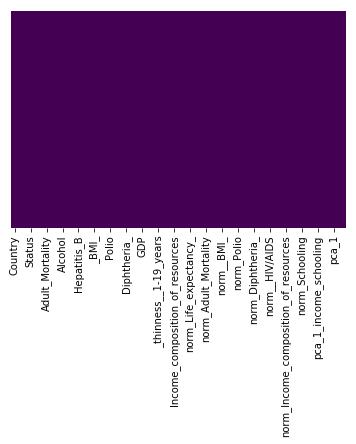

In [181]:
sns.heatmap(trans_life.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### Based on techniques applied during EDA process. See details [here](Univariate%20and%20Multivariate%20Exploration%20Techniques.ipynb), I identified these relevant variables

- Life_expectancy_ 
- Adult_Mortality  
- _BMI_            
- Polio            
- Diphtheria_      
- HIV/AIDS        
- Income_composition_of_resources 
- Schooling                       



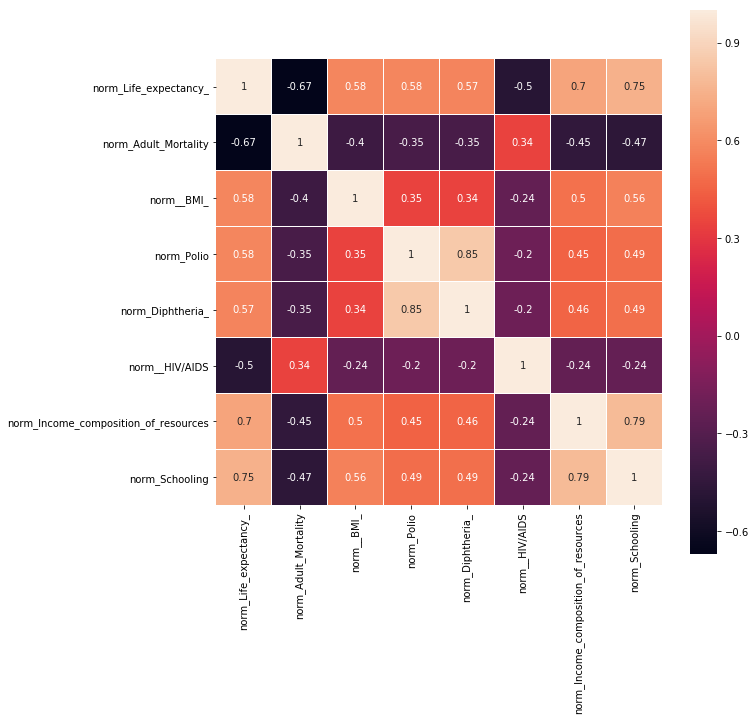

In [180]:
correlation_var = trans_life[['norm_Life_expectancy_','norm_Adult_Mortality','norm__BMI_','norm_Polio','norm_Diphtheria_','norm__HIV/AIDS','norm_Income_composition_of_resources',
                             'norm_Schooling']].corr()

plt.figure(figsize = (10,10))
sns.heatmap(correlation_var, square=True, annot=True, linewidths=0.1)

**After normalizarion and standardization variables, I applied PCA to reduce the dimensionality and this is the result:**


Let's see how many components we should keep in the data:


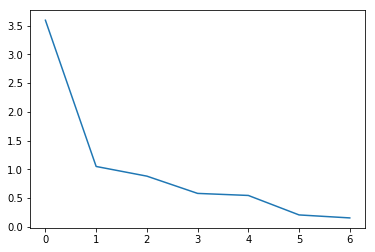

[3.59499298 1.04833596 0.87981432 0.57921948 0.54350942 0.20431291
 0.1522396 ]


In [175]:
print('Let\'s see how many components we should keep in the data:')
plt.plot(eig_val_cov)
plt.show()
print(eig_val_cov)

In [176]:
print('Based on the rule that eigenvalues greater than 1, I have to keep {} components'.format(componentsx))
print(
    'The percentage of total variance in the dataset explained by components from Sklearn PCA: ',
    sklearn_pcax.explained_variance_ratio_)



Based on the rule that eigenvalues greater than 1, I have to keep 2 components
The percentage of total variance in the dataset explained by components from Sklearn PCA:  [0.5133926  0.14971042]


**Now the model is ready**

----------------------------------
By: Wendy Navarrete

7/26/2019